In [5]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("Data/factbook.db")
q = "SELECT * FROM sqlite_master WHERE type = 'table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [6]:
q1 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [8]:
q2 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(q2, conn)

,name,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,South Sudan,0,7256490011,0.0,4.02


In [9]:
q3 = "SELECT name, MIN(population) FROM facts;"
pd.read_sql_query(q3, conn)

,name,MIN(population)
0,Antarctica,0


In [10]:
q4 = "SELECT name, MAX(population) FROM facts;"
pd.read_sql_query(q4, conn)

,name,MAX(population)
0,World,7256490011


### Findings:
- instead of listing the country names, the table also include continent name like Antarctica or group name "World" of all the people in the world which are not comparable to other data in the table

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e104e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11be39e80>]], dtype=object)

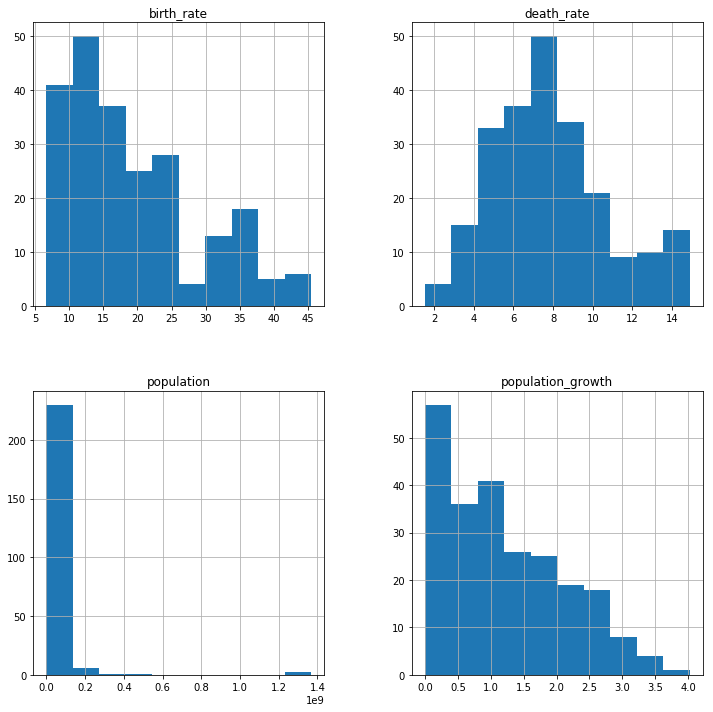

In [37]:
q5 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE (name != 'World' AND name !='Antarctica')"

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

#Comment portion is my original way, below is an alternative way
#df = pd.read_sql_query(q5, conn)
# cols = df.columns.tolist()

# fig = plt.figure(figsize =(12, 12))
# for i in range(4):
#     ax = fig.add_subplot(2, 2, i+1)
#     data = df[cols[i]][df[cols[i]].isnull() == False]
#     ax.set_title(cols[i])
#     ax.hist(data)

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111) #same as add_subplot(1, 1, 1)
pd.read_sql_query(q5, conn).hist(ax = ax)

            pop_density
name                   
Macau             21168
Monaco            15267
Singapore          8259
Hong Kong          6655
Gaza Strip         5191


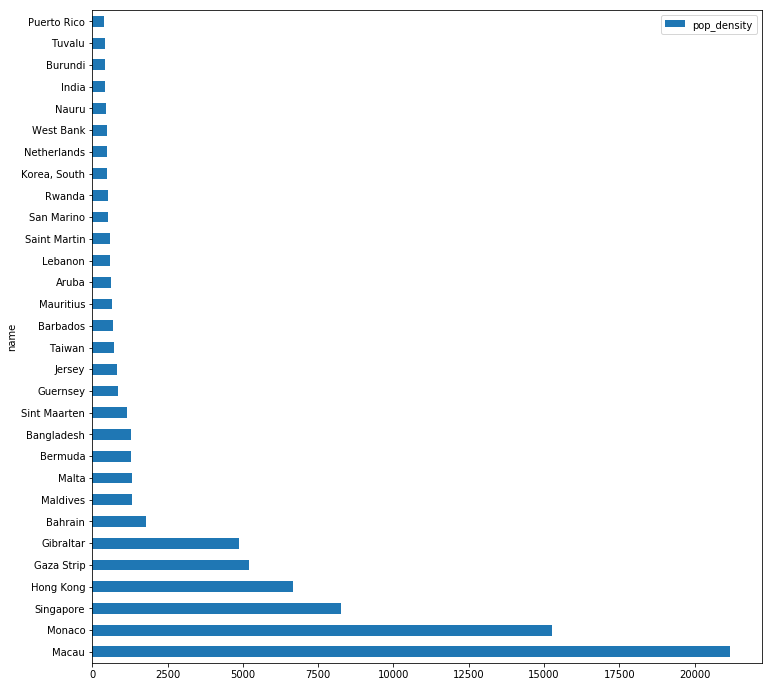

In [66]:
q6 = '''
SELECT name, population/area_land pop_density FROM facts 
WHERE  (name != 'World' AND name !='Antarctica')
ORDER BY pop_density DESC
LIMIT 30'''
fig, ax = plt.subplots(figsize = (12, 12))
df = pd.read_sql_query(q6, conn)
df = df.set_index('name')
print(df.head())
df.plot.barh(ax = ax)
